### CS-675 Project - Sentiment Analysis on COVID-19 Related Tweets
#### Tejomay Kapadia

Reading in the data from CSV to a pandas DataFrame

In [1]:
import pandas as pd

In [2]:
test_df = pd.read_csv('corona_NLP_test.csv')
train_df = pd.read_csv('corona_NLP_train.csv', encoding='latin')

In [3]:
test_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [4]:
test_df['Sentiment'].value_counts()

Negative              1041
Positive               947
Neutral                619
Extremely Positive     599
Extremely Negative     592
Name: Sentiment, dtype: int64

In [5]:
train_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [6]:
train_df['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

**Combining the training and test data into a single dataframe**

In [7]:
combined_df = pd.concat([train_df, test_df], ignore_index=True)
combined_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [8]:
combined_df.isnull().sum()

UserName            0
ScreenName          0
Location         9424
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

**Removing all numbers and special characters from the tweets**

In [9]:
combined_df['CleanedTweets'] = combined_df['OriginalTweet'].str.replace("[^a-zA-Z#]", " ", regex=True)
combined_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,CleanedTweets
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,MeNyrbie Phil Gahan Chrisitv https t co i...
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia Woolworths to give elde...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,Me ready to go at supermarket during the #COV...


In [10]:
combined_df['CleanedTweets'] = combined_df['CleanedTweets'].apply(str.lower)
combined_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,CleanedTweets
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,menyrbie phil gahan chrisitv https t co i...
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworths to give elde...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,my food stock is not the only one which is emp...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,me ready to go at supermarket during the #cov...


**Removing articles and the word 'this' from the data because they don't provide any real insights**

In [11]:
#Removing all articles
def remove_articles(tweet):
    articles = ['a', 'an', 'the', 'this']
    split_tweet = tweet.split(' ')
    truncated_tweet = [word for word in split_tweet if word not in articles]
    joined_tweet = ' '.join(truncated_tweet)
    return joined_tweet

combined_df['CleanedTweets'] = combined_df['CleanedTweets'].apply(remove_articles)
combined_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,CleanedTweets
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,menyrbie phil gahan chrisitv https t co i...
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworths to give elde...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,my food stock is not only one which is empty ...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,me ready to go at supermarket during #covid ...


**Removing all words smaller than 3 letters**

In [12]:
#remove all small words
def remove_small(tweet):
    split_tweet = tweet.split()
    truncated_tweet = [word for word in split_tweet if len(word)>3]
    joined_tweet = ' '.join(truncated_tweet)
    return joined_tweet

combined_df['CleanedTweets'] = combined_df['CleanedTweets'].apply(remove_small)
combined_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,CleanedTweets
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,menyrbie phil gahan chrisitv https https ghgfz...
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice talk your neighbours family exchange ph...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworths give elderly ...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,food stock only which empty please panic there...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,ready supermarket during #covid outbreak becau...


**Tokenizing the tweets so that we can stem them**

In [13]:
#Tokenization
def tokenizer(tweet):
    tokenized_tweet = tweet.split(' ')
    return tokenized_tweet

combined_df['TokenizedTweets'] = combined_df['CleanedTweets'].apply(tokenizer)
combined_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,CleanedTweets,TokenizedTweets
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,menyrbie phil gahan chrisitv https https ghgfz...,"[menyrbie, phil, gahan, chrisitv, https, https..."
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice talk your neighbours family exchange ph...,"[advice, talk, your, neighbours, family, excha..."
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworths give elderly ...,"[coronavirus, australia, woolworths, give, eld..."
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,food stock only which empty please panic there...,"[food, stock, only, which, empty, please, pani..."
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,ready supermarket during #covid outbreak becau...,"[ready, supermarket, during, #covid, outbreak,..."


**Importing a stemmer and stemming the words to only leave us with the root words**

In [14]:
from nltk import PorterStemmer
stemmer = PorterStemmer()
def stem(tokenized_tweet):
    stemmed_tweet = [stemmer.stem(word) for word in tokenized_tweet]
    return stemmed_tweet

combined_df['StemmedTweet'] = combined_df['TokenizedTweets'].apply(stem)
combined_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,CleanedTweets,TokenizedTweets,StemmedTweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,menyrbie phil gahan chrisitv https https ghgfz...,"[menyrbie, phil, gahan, chrisitv, https, https...","[menyrbi, phil, gahan, chrisitv, http, http, g..."
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice talk your neighbours family exchange ph...,"[advice, talk, your, neighbours, family, excha...","[advic, talk, your, neighbour, famili, exchang..."
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworths give elderly ...,"[coronavirus, australia, woolworths, give, eld...","[coronaviru, australia, woolworth, give, elder..."
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,food stock only which empty please panic there...,"[food, stock, only, which, empty, please, pani...","[food, stock, onli, which, empti, pleas, panic..."
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,ready supermarket during #covid outbreak becau...,"[ready, supermarket, during, #covid, outbreak,...","[readi, supermarket, dure, #covid, outbreak, b..."


In [15]:
combined_df = combined_df.drop(['UserName', 'ScreenName', 'Location', 'TweetAt'], axis = 1)

In [16]:
#Combining Tokenized Tweets
def combine(tokenized_tweet):
    combined_tweet = ' '.join(tokenized_tweet)
    return combined_tweet

combined_df['StemmedTweet'] = combined_df['StemmedTweet'].apply(combine)
combined_df.head()

,OriginalTweet,Sentiment,CleanedTweets,TokenizedTweets,StemmedTweet
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,menyrbie phil gahan chrisitv https https ghgfz...,"[menyrbie, phil, gahan, chrisitv, https, https...",menyrbi phil gahan chrisitv http http ghgfzcc ...
1,advice Talk to your neighbours family to excha...,Positive,advice talk your neighbours family exchange ph...,"[advice, talk, your, neighbours, family, excha...",advic talk your neighbour famili exchang phone...
2,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworths give elderly ...,"[coronavirus, australia, woolworths, give, eld...",coronaviru australia woolworth give elderli di...
3,My food stock is not the only one which is emp...,Positive,food stock only which empty please panic there...,"[food, stock, only, which, empty, please, pani...",food stock onli which empti pleas panic there ...
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,ready supermarket during #covid outbreak becau...,"[ready, supermarket, during, #covid, outbreak,...",readi supermarket dure #covid outbreak becaus ...


In [17]:
combined_df = combined_df.drop(['TokenizedTweets'], axis=1)

**Creating a wordcloud to visualize the most common positive and negative words**

In [18]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
#Filtering positive words
positive_df = combined_df[combined_df['Sentiment'].isin(['Positive', 'Extremely Positive'])]
negative_df = combined_df[combined_df['Sentiment'].isin(['Negative', 'Extremely Negative'])]

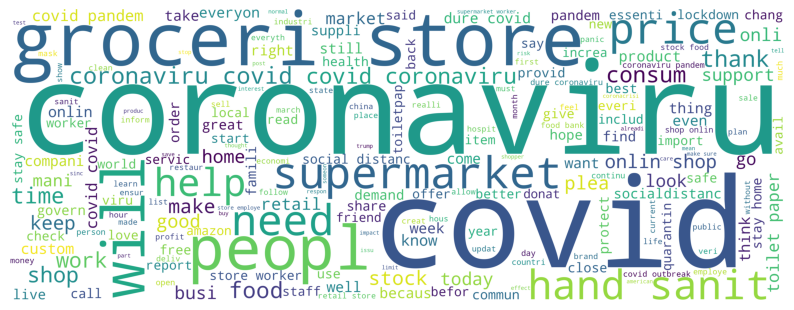

In [19]:
positive_words = ' '.join(word for word in positive_df['StemmedTweet'])
wc = WordCloud(background_color='white', height=1500, width=4000).generate(positive_words)
plt.figure(figsize=(10,20))
plt.imshow(wc)
plt.axis('off')
plt.show()

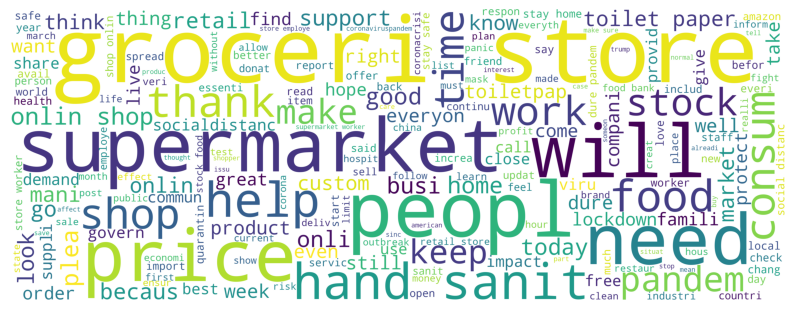

In [20]:
#Removing the words covid and coronaviru
covid = ['covid', 'coronaviru', '#covid', '#coronaviru']
positive_words = positive_words.split(' ')
positive_words = [word for word in positive_words if word not in covid]
positive_words = ' '.join(word for word in positive_words)
wc = WordCloud(background_color='white', height=1500, width=4000).generate(positive_words)
plt.figure(figsize=(10,20))
plt.imshow(wc)
plt.axis('off')
plt.show()

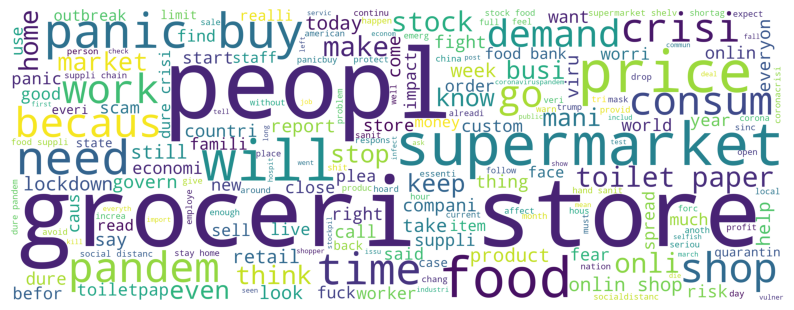

In [21]:
negative_words = ' '.join(word for word in negative_df['StemmedTweet'])
#Removing the words covid and coronaviru
covid = ['covid', 'coronaviru', '#covid', '#coronaviru']
negative_words = negative_words.split(' ')
negative_words = [word for word in negative_words if word not in covid]
negative_words = ' '.join(word for word in negative_words)
wc = WordCloud(background_color='white', height=1500, width=4000).generate(negative_words)
plt.figure(figsize=(10,20))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [22]:
positive_list = positive_df['StemmedTweet'].apply(tokenizer).explode().tolist()
positive_series = pd.Series(positive_list)
negative_list = negative_df['StemmedTweet'].apply(tokenizer).explode().tolist()
negative_series = pd.Series(negative_list)
remove = ['http', 'covid', 'coronaviru', '#covid', '#coronaviru']
positive_series = positive_series[~positive_series.isin(remove)]
negative_series = negative_series[~negative_series.isin(remove)]
positive_plot = positive_series.value_counts().head(20)
negative_plot = negative_series.value_counts().head(20)

**Creating Bar-charts to visualize the most commonly used words**

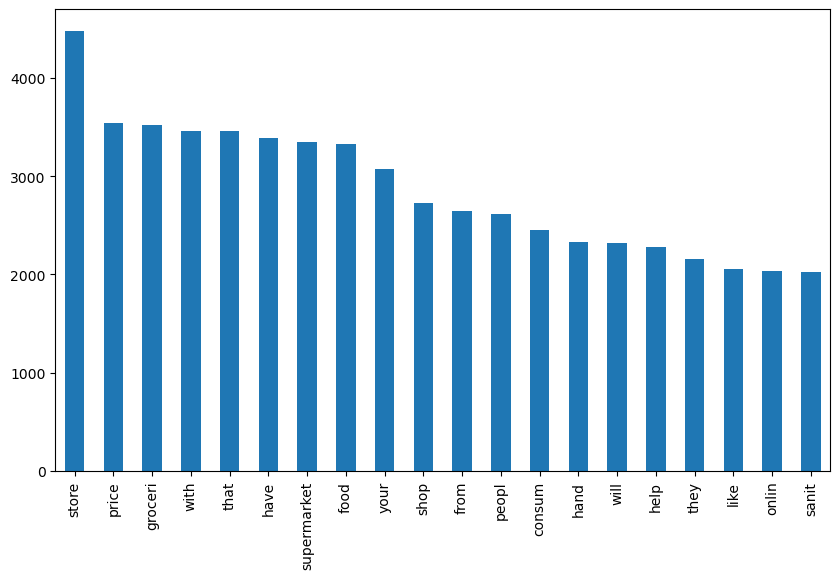

In [23]:
plt.figure(figsize=(10, 6))
positive_plot.plot(kind='bar')
plt.show()

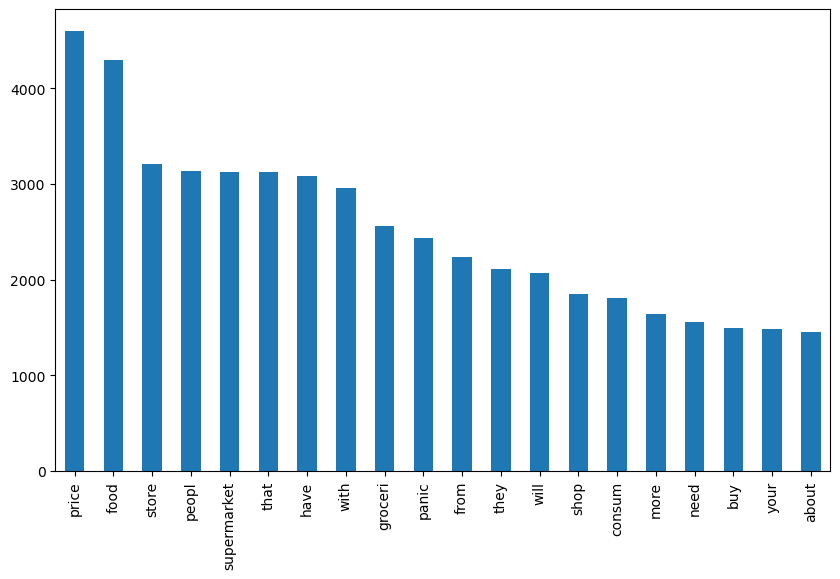

In [24]:
plt.figure(figsize=(10, 6))
negative_plot.plot(kind='bar')
plt.show()

In [25]:
train_df = train_df[train_df['Sentiment'] != 'Neutral']
mapping = {"Extremely Negative": 0, "Negative": 0, "Positive": 1, "Extremely Positive": 1}
train_df['NumericLables'] = train_df['Sentiment'].map(mapping)

combined_df = combined_df[combined_df['Sentiment'] != 'Neutral']
mapping = {"Extremely Negative": 0, "Negative": 0, "Positive": 1, "Extremely Positive": 1}
combined_df['NumericLables'] = combined_df['Sentiment'].map(mapping)

## Transforming The Data to Apply Machine Learning Techniques

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
bag_of_words_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=10000, stop_words='english')
bag_of_words = bag_of_words_vectorizer.fit_transform(combined_df['CleanedTweets'])
df_bag_of_words = pd.DataFrame(bag_of_words.todense())
df_bag_of_words

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36618,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36619,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36620,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36621,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_df=0.90, min_df=2,max_features=10000,stop_words='english')
tfidf_matrix=tfidf.fit_transform(combined_df['CleanedTweets'])
df_tfidf = pd.DataFrame(tfidf_matrix.todense())
df_tfidf

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36618,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36620,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36621,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
train_bag_of_words = bag_of_words[:30000]
train_bag_of_words.todense()

train_tfidf_matrix = tfidf_matrix[:30000]
train_tfidf_matrix.todense()

from sklearn.model_selection import train_test_split

x_train_bag_of_words, x_valid_bag_of_words, y_train_bag_of_words, y_valid_bag_of_words = train_test_split(train_bag_of_words,train_df['NumericLables'][:30000],test_size=0.2,random_state=42)
x_train_tfidf, x_valid_tfidf, y_train_tfidf, y_valid_tfidf = train_test_split(train_tfidf_matrix,train_df['NumericLables'][:30000],test_size=0.2,random_state=42)

## Logistic Regression Model

In [29]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
Log_Reg = LogisticRegression(random_state=42,solver='lbfgs', max_iter=1000)
Log_Reg.fit(x_train_bag_of_words,y_train_bag_of_words)
prediction_bag_of_words = Log_Reg.predict_proba(x_valid_bag_of_words)
prediction_bag_of_words

array([[8.76133314e-01, 1.23866686e-01],
       [6.16792460e-01, 3.83207540e-01],
       [9.56826699e-02, 9.04317330e-01],
       ...,
       [7.79474833e-02, 9.22052517e-01],
       [2.44981117e-04, 9.99755019e-01],
       [8.86440875e-01, 1.13559125e-01]])

In [30]:
prediction_int = prediction_bag_of_words[:,1]>=0.3
prediction_int = prediction_int.astype(int)
print(prediction_int)

log_bag_of_words = accuracy_score(y_valid_bag_of_words, prediction_int)
print(log_bag_of_words)

[0 1 1 ... 1 1 0]
0.8333333333333334


In [31]:
Log_Reg.fit(x_train_tfidf,y_train_tfidf)
prediction_tfidf = Log_Reg.predict_proba(x_valid_tfidf)
print(prediction_tfidf)
prediction_int = prediction_tfidf[:,1]>=0.3
prediction_int = prediction_int.astype(int)
print(prediction_int)
log_tfidf = accuracy_score(y_valid_tfidf, prediction_int)
print(log_tfidf)

[[0.65309868 0.34690132]
 [0.56626019 0.43373981]
 [0.25222982 0.74777018]
 ...
 [0.11133501 0.88866499]
 [0.01950355 0.98049645]
 [0.63803369 0.36196631]]
[1 1 1 ... 1 1 1]
0.7568333333333334


## XGBoost Classifier

In [32]:
from xgboost import XGBClassifier
model_bag_of_words = XGBClassifier(random_state=42,learning_rate=0.9)
model_bag_of_words.fit(x_train_bag_of_words, y_train_bag_of_words)
xgb = model_bag_of_words.predict_proba(x_valid_bag_of_words)
print(xgb)
xgb=xgb[:,1]>=0.3
xgb_int=xgb.astype(int)
xgb_bag_of_words=accuracy_score(y_valid_bag_of_words,xgb_int)
print(xgb_bag_of_words)

[[0.91686153 0.08313844]
 [0.43914133 0.56085867]
 [0.17932785 0.82067215]
 ...
 [0.03875357 0.96124643]
 [0.00945985 0.99054015]
 [0.7656547  0.23434532]]
0.7975


In [33]:
model_tfidf = XGBClassifier(random_state=42,learning_rate=0.7)
model_tfidf.fit(x_train_tfidf, y_train_tfidf)
xgb_tfidf=model_tfidf.predict_proba(x_valid_tfidf)
print(xgb_tfidf)
xgb_tfidf=xgb_tfidf[:,1]>=0.3
xgb_int_tfidf=xgb_tfidf.astype(int)
score=accuracy_score(y_valid_tfidf,xgb_int_tfidf)
print(score)

[[0.8712686  0.12873141]
 [0.3955586  0.6044414 ]
 [0.47551298 0.524487  ]
 ...
 [0.01407439 0.9859256 ]
 [0.00166637 0.99833363]
 [0.86308897 0.13691102]]
0.7768333333333334


In [34]:
Algo_1 = ['LogisticRegression(Bag-of-Words)','XGBoost(Bag-of-Words)']
score_1 = [log_bag_of_words,xgb_bag_of_words]
compare_1 = pd.DataFrame({'Model':Algo_1,'Accuracy':score_1},index=[i for i in range(1,3)])
compare_1.T

,1,2
Model,LogisticRegression(Bag-of-Words),XGBoost(Bag-of-Words)
Accuracy,0.833333,0.7975


In [35]:
Algo_2 = ['LogisticRegression(TF-IDF)','XGBoost(TF-IDF)']
score_2 = [log_tfidf,score]
compare_2 = pd.DataFrame({'Model':Algo_2,'Accuracy':score_2},index=[i for i in range(1,3)])
compare_2.T

,1,2
Model,LogisticRegression(TF-IDF),XGBoost(TF-IDF)
Accuracy,0.756833,0.776833


In [36]:
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Bidirectional, Dense, Embedding
from tensorflow.keras.models import Sequential
import numpy as np
import nltk
nltk.download('punkt')
from nltk import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kapad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [37]:
'''train_df['CleanedTweets'] = train_df['OriginalTweet'].str.replace("[^a-zA-Z#]", " ", regex=True)
train_df['CleanedTweets'] = train_df['CleanedTweets'].apply(str.lower)
train_df['CleanedTweets'] = train_df['CleanedTweets'].apply(remove_articles)
train_df['CleanedTweets'] = train_df['CleanedTweets'].apply(remove_small)'''
train_df = train_df[train_df['Sentiment'] != 'Neutral']
data = train_df['OriginalTweet']
mapping = {"Extremely Negative": 0, "Negative": 0, "Positive": 1, "Extremely Positive": 1}
train_df['NumericLables'] = train_df['Sentiment'].map(mapping)
train_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,NumericLables
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,1
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,1
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,1
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,0
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive,1


In [38]:
labels = train_df['NumericLables']
all_words = [word.lower() for sentence in data for word in word_tokenize(sentence)]
unique_words = set(all_words)
print(len(unique_words))

73830


In [39]:
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Flatten

In [40]:
tokenizer = Tokenizer(num_words=75000)
tokenizer.fit_on_texts(data)
sequences = tokenizer.texts_to_sequences(data)
X = pad_sequences(sequences)
y = np.array(labels)

In [41]:
model = Sequential()
model.add(Embedding(input_dim = 75000, output_dim=32, input_length=X.shape[1]))
model.add(SimpleRNN(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])
model.fit(X, y, epochs=10, batch_size=64, validation_split=0.2)



Epoch 1/10


419/419 [==============================] - 71s 160ms/step - loss: 0.6379 - accuracy: 0.6074 - val_loss: 0.4468 - val_accuracy: 0.7874
Epoch 2/10
419/419 [==============================] - 60s 142ms/step - loss: 0.2921 - accuracy: 0.8809 - val_loss: 0.3158 - val_accuracy: 0.8684
Epoch 3/10
419/419 [==============================] - 67s 161ms/step - loss: 0.1090 - accuracy: 0.9637 - val_loss: 0.3542 - val_accuracy: 0.8527
Epoch 4/10
419/419 [==============================] - 64s 154ms/step - loss: 0.0479 - accuracy: 0.9850 - val_loss: 0.4884 - val_accuracy: 0.8438
Epoch 5/10
419/419 [==============================] - 68s 163ms/step - loss: 0.0243 - accuracy: 0.9930 - val_loss: 0.4344 - val_accuracy: 0.8533
Epoch 6/10
419/419 [==============================] - 55s 132ms/step - loss: 0.0141 - accuracy: 0.9958 - val_loss: 0.5033 - val_accuracy: 0.8577
Epoch 7/10
419/419 [==============================] - 59s 141ms/step - loss: 0.0123 - accuracy: 0.9966 - val_loss: 0.4877 - va

In [42]:
'''test_df['CleanedTweets'] = test_df['OriginalTweet'].str.replace("[^a-zA-Z#]", " ", regex=True)
test_df['CleanedTweets'] = test_df['CleanedTweets'].apply(str.lower)
test_df['CleanedTweets'] = test_df['CleanedTweets'].apply(remove_articles)
test_df['CleanedTweets'] = test_df['CleanedTweets'].apply(remove_small)'''
test_df = test_df[test_df['Sentiment'] != 'Neutral']
test_data = test_df['OriginalTweet']
mapping = {"Extremely Negative": 0, "Negative": 0, "Positive": 1, "Extremely Positive": 1}
test_df['NumericLables'] = test_df['Sentiment'].map(mapping)
test_labels = test_df['NumericLables']
test_all_words = [word.lower() for sentence in test_data for word in word_tokenize(sentence)]
test_tokenizer = Tokenizer(num_words=65000)
test_tokenizer.fit_on_texts(test_data)
test_sequences = tokenizer.texts_to_sequences(test_data)
X_test = pad_sequences(test_sequences)
y_test = np.array(test_labels)

In [43]:
loss, accuracy = model.evaluate(X_test, y_test)

100/100 [==============================] - 2s 15ms/step - loss: 0.6611 - accuracy: 0.7924


## Hyperparameter Tuning

In [44]:
from keras.optimizers import Adam
from keras.layers import Dropout
from keras.regularizers import l2
model = Sequential()
model.add(Embedding(input_dim = 75000, output_dim=50, input_length=X.shape[1]))
model.add(SimpleRNN(128, activation='relu',kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer = Adam(learning_rate=0.001), loss = 'binary_crossentropy', metrics=['accuracy'])
model.fit(X, y, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
419/419 [==============================] - 112s 258ms/step - loss: 0.7901 - accuracy: 0.5379 - val_loss: 0.6877 - val_accuracy: 0.6180
Epoch 2/5
419/419 [==============================] - 125s 299ms/step - loss: 0.4712 - accuracy: 0.7922 - val_loss: 0.3635 - val_accuracy: 0.8523
Epoch 3/5
419/419 [==============================] - 113s 270ms/step - loss: 0.2121 - accuracy: 0.9321 - val_loss: 0.4427 - val_accuracy: 0.8548
Epoch 4/5
419/419 [==============================] - 122s 290ms/step - loss: 0.1305 - accuracy: 0.9645 - val_loss: 0.3716 - val_accuracy: 0.8652
Epoch 5/5
419/419 [==============================] - 89s 212ms/step - loss: 0.0815 - accuracy: 0.9809 - val_loss: 0.4149 - val_accuracy: 0.8617


In [45]:
loss, accuracy = model.evaluate(X_test, y_test)

100/100 [==============================] - 2s 10ms/step - loss: 0.4777 - accuracy: 0.8411


## GRU Model

In [46]:
gru_model = Sequential(name="GRU_Model")
gru_model.add(Embedding(input_dim = 75000, output_dim=50, input_length=X.shape[1]))
gru_model.add(GRU(128, activation='relu', return_sequences=False, kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))
gru_model.add(Dense(1, activation='sigmoid'))
gru_model.compile(optimizer = Adam(learning_rate=0.001),loss="binary_crossentropy", metrics=['accuracy'])
gru_model.fit(X, y, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
419/419 [==============================] - 177s 412ms/step - loss: 0.7571 - accuracy: 0.5387 - val_loss: 0.6944 - val_accuracy: 0.5961
Epoch 2/5
419/419 [==============================] - 154s 368ms/step - loss: 0.4472 - accuracy: 0.8143 - val_loss: 0.3691 - val_accuracy: 0.8526
Epoch 3/5
419/419 [==============================] - 105s 250ms/step - loss: 0.1993 - accuracy: 0.9360 - val_loss: 0.4337 - val_accuracy: 0.8308
Epoch 4/5
419/419 [==============================] - 84s 201ms/step - loss: 0.1150 - accuracy: 0.9680 - val_loss: 0.4376 - val_accuracy: 0.8584
Epoch 5/5
419/419 [==============================] - 84s 200ms/step - loss: 0.0811 - accuracy: 0.9804 - val_loss: 0.4543 - val_accuracy: 0.8563


In [47]:
loss, accuracy = gru_model.evaluate(X_test, y_test)

100/100 [==============================] - 4s 30ms/step - loss: 0.5117 - accuracy: 0.8336


## LSTM Model

In [48]:
lstm_model = Sequential(name="LSTM_Model")
lstm_model.add(Embedding(input_dim = 75000, output_dim=50, input_length=X.shape[1]))
lstm_model.add(LSTM(128, activation='relu', return_sequences=False))
lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.compile(optimizer = Adam(learning_rate=0.0001),loss="binary_crossentropy", metrics=['accuracy'])
lstm_model.fit(X, y, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
419/419 [==============================] - 100s 230ms/step - loss: 0.6845 - accuracy: 0.5350 - val_loss: 0.6455 - val_accuracy: 0.5805
Epoch 2/5
419/419 [==============================] - 91s 216ms/step - loss: 0.6543 - accuracy: 0.5862 - val_loss: 0.6003 - val_accuracy: 0.6716
Epoch 3/5
419/419 [==============================] - 92s 219ms/step - loss: 0.7447 - accuracy: 0.7304 - val_loss: 0.6342 - val_accuracy: 0.6669
Epoch 4/5
419/419 [==============================] - 92s 219ms/step - loss: 0.6177 - accuracy: 0.7257 - val_loss: 0.6145 - val_accuracy: 0.7100
Epoch 5/5
419/419 [==============================] - 92s 219ms/step - loss: 0.5797 - accuracy: 0.7840 - val_loss: 0.5703 - val_accuracy: 0.7439


In [49]:
loss, accuracy = lstm_model.evaluate(X_test, y_test)

100/100 [==============================] - 3s 25ms/step - loss: 0.5988 - accuracy: 0.7046
